In [1]:
import pandas as pd

In [2]:
df_smoke = pd.read_csv("Smoke_Daily_by_State.csv")
df_smoke.head()

,State,Average_of_2011to2015
0,Alabama,22.42
1,Alaska,21.00
2,Arizona,16.64
3,Arkansas,25.50
4,California,12.66


In [3]:
df_lung = pd.read_csv("lung_bycounty.csv", encoding = 'ISO-8859-1')
df_skin = pd.read_csv("skin_bycounty.csv", encoding = 'ISO-8859-1')
df_blood = pd.read_csv("leukemia_bycounty.csv", encoding = 'ISO-8859-1')

df_skin.columns = ["County", "a", "Incidence Rate", "b", "c", "d", "e", "f", "g", "h"]
df_lung.columns = ["County", "a", "a2", "Incidence Rate", "b", "c", "d", "e", "f", "g", "h"]
df_blood.columns = ["County", "a", "a2", "Incidence Rate", "b", "c", "d", "e", "f", "g", "h"]

df_skin.drop(columns=["a","b", "c", "d", "e", "f", "g", "h"], inplace=True)
df_lung.drop(columns=["a", "a2", "b", "c", "d", "e", "f", "g", "h"], inplace=True)
df_blood.drop(columns=["a", "a2", "b", "c", "d", "e", "f", "g", "h"], inplace=True)

df_skin["Incidence Rate"] = df_skin["Incidence Rate"].str.replace("#", "")
df_lung["Incidence Rate"] = df_lung["Incidence Rate"].str.replace("#", "")
df_blood["Incidence Rate"] = df_blood["Incidence Rate"].str.replace("#", "")

df_skin.drop(0, inplace=True)
df_lung.drop(0, inplace=True)
df_blood.drop(0, inplace=True)

new_skin = df_skin["County"].str.split("(", n = 1, expand = True)
df_skin["County"]= new_skin[0]
new_blood = df_blood["County"].str.split("(", n = 1, expand = True)
df_blood["County"]= new_blood[0]
new_lung = df_lung["County"].str.split("(", n = 1, expand = True)
df_lung["County"]= new_lung[0]

df_skin.rename(columns={"Incidence Rate": "Skin_IR"}, inplace=True)
df_blood.rename(columns={"Incidence Rate": "Blood_IR"}, inplace=True)
df_lung.rename(columns={"Incidence Rate": "Lung_IR"}, inplace=True)

skin_lung_df = pd.merge(df_skin, df_lung, on='County')
final_cancer_df = pd.merge(skin_lung_df, df_blood, on='County')

final_cancer_df.head()

,County,Skin_IR,Lung_IR,Blood_IR
0,"Summit County, Utah",76.1,18.6,11.2
1,"Towns County, Georgia",62.1,65.9,*
2,"Pickens County, Georgia",61.6,81.5,16.4
3,"Lumpkin County, Georgia",56.8,73.6,15.5
4,"Forsyth County, Georgia",55.2,54.6,16.9


In [4]:
new_state = final_cancer_df["County"].str.split(" ", n = 2, expand = True)
final_cancer_df["County"] = new_state[2]
final_cancer_df.head()

,County,Skin_IR,Lung_IR,Blood_IR
0,Utah,76.1,18.6,11.2
1,Georgia,62.1,65.9,*
2,Georgia,61.6,81.5,16.4
3,Georgia,56.8,73.6,15.5
4,Georgia,55.2,54.6,16.9


In [5]:
final_cancer_df.rename(columns={"County": "State"}, inplace=True)

In [6]:
final_cancer_df.head()

,State,Skin_IR,Lung_IR,Blood_IR
0,Utah,76.1,18.6,11.2
1,Georgia,62.1,65.9,*
2,Georgia,61.6,81.5,16.4
3,Georgia,56.8,73.6,15.5
4,Georgia,55.2,54.6,16.9


In [7]:
final_cancer_df.Skin_IR = final_cancer_df.Skin_IR.str.replace("*", "")
final_cancer_df.Lung_IR = final_cancer_df.Lung_IR.str.replace("*", "")
final_cancer_df.Blood_IR = final_cancer_df.Blood_IR.str.replace("*", "")

In [9]:
import numpy as np

In [10]:
final_cancer_df[final_cancer_df.Blood_IR==' '] = np.nan
final_cancer_df["Blood_IR"]= final_cancer_df["Blood_IR"].astype("float")
final_cancer_df["Skin_IR"]= final_cancer_df["Skin_IR"].astype("float")
final_cancer_df["Lung_IR"]= final_cancer_df["Lung_IR"].astype("float")
new_final_cancer_df = final_cancer_df.groupby("State").mean()
new_final_cancer_df.head()

,Skin_IR,Lung_IR,Blood_IR
State,,,
Alabama,20.765854,70.195122,12.809756
Alaska,16.300000,59.700000,11.500000
Arizona,17.558333,46.083333,11.950000
Arkansas,20.008571,82.540000,13.822857
"Borough, Alaska",12.800000,57.600000,9.800000


In [12]:
df_smoke.rename(columns={"Average_of_2011to2015": "Smoking Rate"}, inplace=True)
df_smoke.head()

,State,Smoking Rate
0,Alabama,22.42
1,Alaska,21.00
2,Arizona,16.64
3,Arkansas,25.50
4,California,12.66


In [13]:
final_df = pd.merge(new_final_cancer_df, df_smoke, on='State')
final_df.head()

,State,Skin_IR,Lung_IR,Blood_IR,Smoking Rate
0,Alabama,20.765854,70.195122,12.809756,22.42
1,Alaska,16.300000,59.700000,11.500000,21.00
2,Arizona,17.558333,46.083333,11.950000,16.64
3,Arkansas,20.008571,82.540000,13.822857,25.50
4,California,26.113158,49.544737,14.105263,12.66


In [14]:
import matplotlib.pyplot as plt

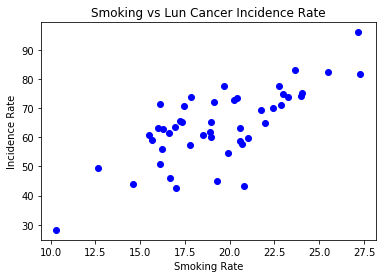

In [16]:
plt.plot(final_df["Smoking Rate"], final_df["Lung_IR"], "bo")
plt.title("Smoking vs Lun Cancer Incidence Rate")
plt.xlabel("Smoking Rate")
plt.ylabel("Incidence Rate")
plt.savefig("Images/smoke_lung.png")
plt.show()

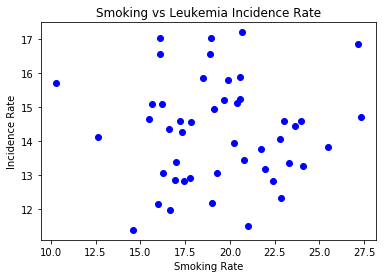

In [17]:
plt.plot(final_df["Smoking Rate"], final_df["Blood_IR"], "bo")
plt.title("Smoking vs Leukemia Incidence Rate")
plt.xlabel("Smoking Rate")
plt.ylabel("Incidence Rate")
plt.savefig("Images/smoke_blood.png")
plt.show()

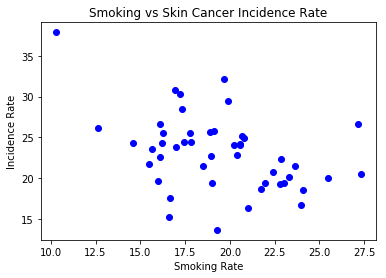

In [18]:
plt.plot(final_df["Smoking Rate"], final_df["Skin_IR"], "bo")
plt.title("Smoking vs Skin Cancer Incidence Rate")
plt.xlabel("Smoking Rate")
plt.ylabel("Incidence Rate")
plt.savefig("Images/smoke_skin.png")
plt.show()